# Analysing combined log files

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import arviz
from gamma_dist_funcs import mean_rate_years_gamma_df

In [2]:
ON_youngest_tip = 2022.7615296803654
MD_youngest_tip = 2022.6957762557079

all_youngest_tip = np.min([ON_youngest_tip, MD_youngest_tip])

## Beast model using ON-2022 dataset of 2022 Enterovirus samples.

### 7 day Infectious period rate of becoming uninfectious of 52/year
Load combined log file into pandas.

In [3]:
burnin = 0.1
ON_df = pd.read_table('beast_xmls/ON-2022/ON_combined_run_1_3_4.log', sep='\t', comment='#')
ON_df = ON_df[int(burnin*len(ON_df)):]
ON_df.reset_index(inplace=True)
ON_df

,index,Sample,posterior,likelihood,prior,treeLikelihood,Tree.height,Tree.treeLength,gammaShape,kappa,...,reproductiveNumber_BDSKY_Serial.3,reproductiveNumber_BDSKY_Serial.4,reproductiveNumber_BDSKY_Serial.5,reproductiveNumber_BDSKY_Serial.6,reproductiveNumber_BDSKY_Serial.7,reproductiveNumber_BDSKY_Serial.8,reproductiveNumber_BDSKY_Serial.9,reproductiveNumber_BDSKY_Serial.10,samplingProportion_BDSKY_Serial,Unnamed: 32
0,2700,13500000,-19748.245272,-19947.989991,199.744719,-19947.989991,0.524958,10.529981,0.11442,19.025911,...,1.230031,0.921972,0.803139,1.148825,0.895978,1.334593,1.917918,1.047528,0.000717,NaN
1,2701,13505000,-19796.517337,-19968.800475,172.283138,-19968.800475,0.571736,11.923861,0.11442,19.025911,...,0.831386,1.709652,0.520186,1.656465,0.869602,1.044975,1.888091,1.036737,0.000499,NaN
2,2702,13510000,-19778.819472,-19958.154985,179.335514,-19958.154985,0.619102,12.104150,0.11442,19.025911,...,1.367293,0.417569,0.596942,1.050534,0.985819,1.556522,2.655625,0.904870,0.000559,NaN
3,2703,13515000,-19755.631109,-19954.413081,198.781971,-19954.413081,0.579183,12.218316,0.11442,19.025911,...,0.960667,0.107628,1.700026,1.145844,0.857555,1.504198,2.789896,1.018290,0.000574,NaN
4,2704,13520000,-19765.457137,-19951.781954,186.324817,-19951.781954,0.570558,13.346538,0.11442,19.025911,...,2.110699,0.181022,1.155856,1.255267,0.926254,1.385585,2.905888,1.289118,0.000102,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24298,26998,134990000,-19783.490721,-19955.831322,172.340602,-19955.831322,0.506847,10.598960,0.10348,19.841884,...,1.361152,1.423551,0.295194,1.062494,1.215292,1.419378,2.046239,0.920177,0.000443,NaN
24299,26999,134995000,-19781.341897,-19955.407931,174.066034,-19955.407931,0.468010,9.978251,0.10348,19.841884,...,1.950364,1.216967,0.109697,1.225549,1.419517,1.665497,2.440825,0.652667,0.000534,NaN
24300,27000,135000000,-19785.761569,-19961.884878,176.123309,-19961.884878,0.520770,10.992880,0.10348,19.841884,...,0.845445,0.620622,1.028797,1.287039,1.098716,1.403246,2.357238,0.778068,0.000252,NaN
24301,27001,135005000,-19791.197009,-19950.834031,159.637022,-19950.834031,0.539756,11.498300,0.10348,19.841884,...,1.283743,0.284638,1.032463,0.947830,1.168698,1.490145,2.025117,1.020233,0.000525,NaN


## Checking movement of posterior uninfectious period compared to prior.

In [4]:
# set standard deviation
sigma_yearly = 15
mean_infection_period = 7
mean_yearly_rate = int(round((1/mean_infection_period)*365))
gamma_dict_7_day, prior_7_day_df = mean_rate_years_gamma_df(mu=mean_yearly_rate, sd=sigma_yearly, min_range=0, max_range=120, return_gamma_dict=True)
prior_7_day_df

,Rate per Year,Rate per Day,Probability
0,0,0.000000,0.000000e+00
1,1,0.002740,4.306742e-16
2,2,0.005479,7.086962e-13
3,3,0.008219,4.900317e-11
4,4,0.010959,9.255527e-10
...,...,...,...
116,116,0.317808,6.875526e-05
117,117,0.320548,5.998029e-05
118,118,0.323288,5.228313e-05
119,119,0.326027,4.553768e-05


[(0.0, 0.03)]

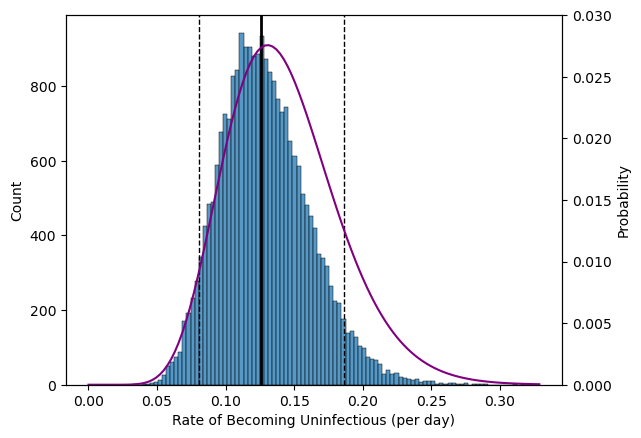

In [5]:
fig, ax1 = plt.subplots() # initializes figure and plots

ax2 = ax1.twinx() # applies twinx to ax2, which is the second y axis. 

ON_df['Rate of Becoming Uninfectious (per day)'] = (ON_df['becomeUninfectiousRate_BDSKY_Serial']/365)
sns.histplot(ON_df['Rate of Becoming Uninfectious (per day)'], ax=ax1)
ax1.axvline(ON_df['Rate of Becoming Uninfectious (per day)'].median(), color='k', lw=2)
ax1.axvline(ON_df['Rate of Becoming Uninfectious (per day)'].quantile(0.05), color='k', ls='--', lw=1)
ax1.axvline(ON_df['Rate of Becoming Uninfectious (per day)'].quantile(0.95), color='k', ls='--', lw=1)

sns.lineplot(x = prior_7_day_df['Rate per Day'], y = prior_7_day_df['Probability'],  color = 'purple', ax = ax2)
ax2.set(ylim=(0,0.03))


## Beast model using MD-2022 dataset of 2022 Enterovirus samples.

### 7 day Infectious period rate of becoming uninfectious of 52/year
Load combined log file into pandas.

In [6]:
burnin = 0.1
MD_df = pd.read_table('beast_xmls/MD-2022/MD_combined_run_4to6.log', sep='\t', comment='#')
MD_df = MD_df[int(burnin*len(MD_df)):]
MD_df.reset_index(inplace=True)
MD_df

,index,Sample,posterior,likelihood,prior,treeLikelihood,Tree.height,Tree.treeLength,kappa,freqParameter.1,...,reproductiveNumber_BDSKY_Serial.3,reproductiveNumber_BDSKY_Serial.4,reproductiveNumber_BDSKY_Serial.5,reproductiveNumber_BDSKY_Serial.6,reproductiveNumber_BDSKY_Serial.7,reproductiveNumber_BDSKY_Serial.8,reproductiveNumber_BDSKY_Serial.9,reproductiveNumber_BDSKY_Serial.10,samplingProportion_BDSKY_Serial,Unnamed: 32
0,2700,13500000,-22519.399786,-22574.020851,54.621065,-22574.020851,0.879836,17.556449,15.279540,0.306571,...,1.205127,2.272799,0.438714,0.542535,1.382557,1.290281,2.172769,1.291873,0.000413,NaN
1,2701,13505000,-22509.002810,-22551.557246,42.554436,-22551.557246,1.002141,20.532480,16.675412,0.306571,...,1.690398,1.022469,1.104495,0.847957,0.956432,1.187133,1.815898,1.212159,0.000405,NaN
2,2702,13510000,-22493.603481,-22552.101046,58.497566,-22552.101046,1.030494,19.170776,15.606157,0.304691,...,1.255568,0.363419,0.970782,0.933771,1.178329,1.330505,1.938525,1.229580,0.000366,NaN
3,2703,13515000,-22503.327334,-22552.221590,48.894255,-22552.221590,0.884202,19.098559,14.931068,0.304691,...,1.530557,0.870145,1.338573,0.565813,1.497813,1.417355,2.052579,1.201859,0.000116,NaN
4,2704,13520000,-22511.233450,-22565.868522,54.635072,-22565.868522,0.978864,19.463856,14.931068,0.304691,...,1.579095,0.411642,1.619048,0.378881,1.442164,1.357070,2.127798,1.137935,0.000335,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24298,26998,134990000,-22535.992650,-22552.444469,16.451818,-22552.444469,1.161484,24.377273,15.406747,0.314144,...,0.519203,0.850374,1.440459,0.426046,1.143824,1.441157,2.085509,1.112034,0.000034,NaN
24299,26999,134995000,-22550.042537,-22554.382669,4.340131,-22554.382669,1.161730,24.734829,15.406747,0.314144,...,0.203998,1.272261,1.051739,0.640609,1.304597,1.514267,2.465402,1.274309,0.000028,NaN
24300,27000,135000000,-22527.908644,-22561.599362,33.690718,-22561.599362,1.246004,24.405219,14.656380,0.313920,...,1.347178,0.457487,0.864900,1.060042,1.121371,1.333886,2.467911,1.260872,0.000041,NaN
24301,27001,135005000,-22516.480997,-22552.119697,35.638700,-22552.119697,1.143839,23.376747,14.656380,0.313920,...,0.753604,0.479308,1.227593,1.043456,1.128384,1.578132,2.124739,1.152772,0.000181,NaN


[(0.0, 0.03)]

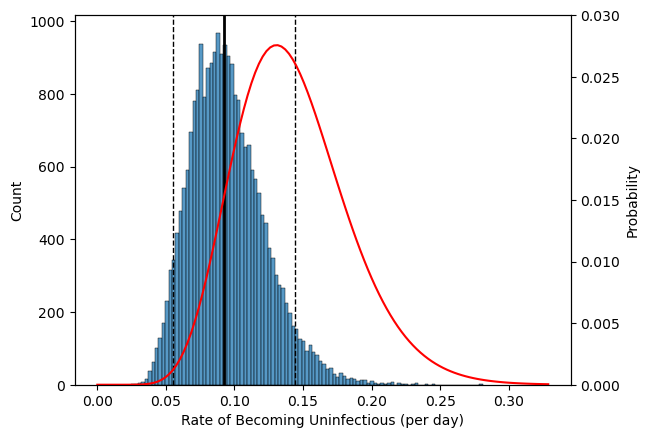

In [7]:
fig, ax1 = plt.subplots() # initializes figure and plots

ax2 = ax1.twinx() # applies twinx to ax2, which is the second y axis. 

MD_df['Rate of Becoming Uninfectious (per day)'] = (MD_df['becomeUninfectiousRate_BDSKY_Serial']/365)
sns.histplot(MD_df['Rate of Becoming Uninfectious (per day)'], ax=ax1)
ax1.axvline(MD_df['Rate of Becoming Uninfectious (per day)'].median(), color='k', lw=2)
ax1.axvline(MD_df['Rate of Becoming Uninfectious (per day)'].quantile(0.05), color='k', ls='--', lw=1)
ax1.axvline(MD_df['Rate of Becoming Uninfectious (per day)'].quantile(0.95), color='k', ls='--', lw=1)

sns.lineplot(x = prior_7_day_df['Rate per Day'], y = prior_7_day_df['Probability'],  color = 'red', ax = ax2)
ax2.set(ylim=(0,0.03))


# Adding fields, melting and merging datasets into one 

In [8]:
dfs_melted = []
replacements = {'ORCRatesStat.mean': 'Mean Substitution Rate',
                'ORCRatesStat.SD': 'S.D. Substitution Rate',
                'ORCRatesStat.coefficientOfVariation': 'Coeff. of Variation\nSubstitution Rate',
                'Tree.height': 'TMRCA',
                'origin_BDSKY_Serial': 'Origin'}
for number in range(1,11):
    replacements['reproductiveNumber_BDSKY_Serial.' +str(number)] ='R_{e} '+str(number)

dfs_dict = {'ON-2022':ON_df, 'MD-2022':MD_df}
for name, df in dfs_dict.items():
    df['ORCRatesStat.SD'] = df['ORCRatesStat.variance']**0.5
    df['Rate of Becoming Uninfectious (per day)'] = df['becomeUninfectiousRate_BDSKY_Serial']/365
    df['Infection Period in days'] = 1/df['Rate of Becoming Uninfectious (per day)']
    df.rename(columns=replacements, inplace=True)
    df_melt = pd.melt(df)
    
    df_melt['Data Set'] = name
    
    dfs_melted.append(df_melt)


dfs_melted = pd.concat(dfs_melted)
dfs_melted.rename(columns={'value':'Estimate'},inplace =True)
dfs_melted

,variable,Estimate,Data Set
0,index,2700.000000,ON-2022
1,index,2701.000000,ON-2022
2,index,2702.000000,ON-2022
3,index,2703.000000,ON-2022
4,index,2704.000000,ON-2022
...,...,...,...
899206,Infection Period in days,9.065911,MD-2022
899207,Infection Period in days,11.297265,MD-2022
899208,Infection Period in days,10.949771,MD-2022
899209,Infection Period in days,11.146070,MD-2022


# Plotting of Epidimiological parameter estimates

/tmp/ipykernel_517367/2859419611.py:11: RuntimeWarning: divide by zero encountered in long_scalars
  inverse_tick = 1/tick


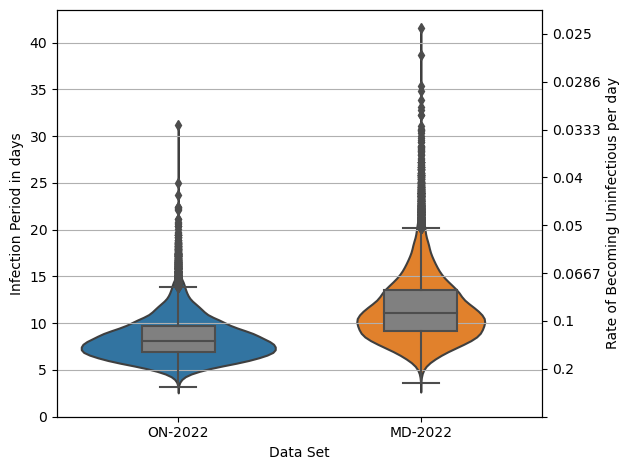

In [17]:
df_inf_period = dfs_melted[dfs_melted['variable']=='Infection Period in days']
ax = sns.violinplot(data=df_inf_period,y='Estimate',x='Data Set',inner=None)
ax.set_yticks(range(0,45,5))

plt.grid(axis='y')
ax2 = ax.twinx()
sns.boxplot(data=df_inf_period,y='Estimate',x='Data Set', ax=ax2,color='grey',width=0.3)
ax2.set_yticks(range(0,45,5))
inverse_ticks = []
for tick in ax2.get_yticks(): 
    inverse_tick = 1/tick
    if tick != 0:
        inverse_ticks.append(str(round(inverse_tick,4)))
    else:
        inverse_ticks.append(' ')
ax2.set_yticklabels(inverse_ticks)
ax2.set(ylabel='Rate of Becoming Uninfectious per day')
ax.set(ylabel='Infection Period in days')
plt.tight_layout()
plt.savefig('figures/Infectious Period box-violineplots.png')

In [10]:
ON_df.columns

Index(['index', 'Sample', 'posterior', 'likelihood', 'prior', 'treeLikelihood',
       'TMRCA', 'Tree.treeLength', 'gammaShape', 'kappa', 'freqParameter.1',
       'freqParameter.2', 'freqParameter.3', 'freqParameter.4', 'ORCucldMean',
       'ORCsigma', 'Mean Substitution Rate', 'ORCRatesStat.variance',
       'Coeff. of Variation\nSubstitution Rate', 'BDSKY_Serial', 'Origin',
       'becomeUninfectiousRate_BDSKY_Serial', 'R_{e} 1', 'R_{e} 2', 'R_{e} 3',
       'R_{e} 4', 'R_{e} 5', 'R_{e} 6', 'R_{e} 7', 'R_{e} 8', 'R_{e} 9',
       'R_{e} 10', 'samplingProportion_BDSKY_Serial', 'Unnamed: 32',
       'Rate of Becoming Uninfectious (per day)', 'S.D. Substitution Rate',
       'Infection Period in days'],
      dtype='object')

In [11]:
def median_and_hpd(df, field, hdi_prob=.95):
    hpdi = arviz.hdi(df[field].to_numpy(), hdi_prob=.95)
    return {'median': df[field].median(), 'lower '+str(hdi_prob) +' HPD': hpdi[0], 'upper '+str(hdi_prob) +' HPD': hpdi[1]}

def accross_dfs_median_and_hpd(dfs_dict, field, hdi_prob=.95):
    return_dict = {}
    for name, df in dfs_dict.items():
        return_dict[name] = median_and_hpd(df, field, hdi_prob=.95)
    
    return return_dict


field = 'Infection Period in days'
accross_dfs_median_and_hpd(dfs_dict, field, hdi_prob=.95)

{'ON-2022': {'median': 7.937748815710215,
  'lower 0.95 HPD': 4.5538121030021745,
  'upper 0.95 HPD': 12.761816711819247},
 'MD-2022': {'median': 10.849238272176132,
  'lower 0.95 HPD': 5.854120557305025,
  'upper 0.95 HPD': 18.625119299629585}}

# Plotting of Evoloutionary parameter estimates

/opt/Applications/anaconda3/envs/omics/lib/python3.11/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/Applications/anaconda3/envs/omics/lib/python3.11/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


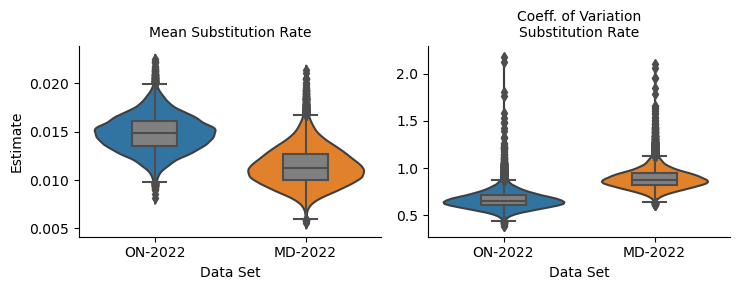

In [16]:
selected = ['Mean Substitution Rate', 'Coeff. of Variation\nSubstitution Rate']#, 'S.D. Substitution Rate']
df_evol = dfs_melted[dfs_melted['variable'].isin(selected)]
fgridplot = sns.FacetGrid(data=df_evol, col='variable', col_order=selected, sharey=False, aspect=1.25)
fgridplot.map(sns.violinplot,'Data Set', 'Estimate',palette=sns.color_palette(),inner=None)
fgridplot.map(sns.boxplot,'Data Set', 'Estimate', width=0.3,color='grey', boxprops={'zorder': 2})
fgridplot.set_titles(col_template="{col_name}")
plt.tight_layout()
plt.savefig('figures/Substitution rate box-violineplot.png')

In [13]:
field = 'Mean Substitution Rate'
accross_dfs_median_and_hpd(dfs_dict, field, hdi_prob=.95)

{'ON-2022': {'median': 0.0148397360265956,
  'lower 0.95 HPD': 0.0111899993108019,
  'upper 0.95 HPD': 0.0185008967873509},
 'MD-2022': {'median': 0.0112730006830141,
  'lower 0.95 HPD': 0.0077821081954238,
  'upper 0.95 HPD': 0.015354040080225}}

In [14]:
field = 'S.D. Substitution Rate'
accross_dfs_median_and_hpd(dfs_dict, field, hdi_prob=.95)

{'ON-2022': {'median': 0.009542768462136284,
  'lower 0.95 HPD': 0.006454248331365103,
  'upper 0.95 HPD': 0.01336390241964547},
 'MD-2022': {'median': 0.009476267492547031,
  'lower 0.95 HPD': 0.006104314249545982,
  'upper 0.95 HPD': 0.014021546167701944}}

In [15]:
field = 'Coeff. of Variation\nSubstitution Rate'
accross_dfs_median_and_hpd(dfs_dict, field, hdi_prob=.95)

{'ON-2022': {'median': 0.6552568220455355,
  'lower 0.95 HPD': 0.4987048249449473,
  'upper 0.95 HPD': 0.8378863441440153},
 'MD-2022': {'median': 0.8789313517131581,
  'lower 0.95 HPD': 0.7058487252400519,
  'upper 0.95 HPD': 1.0952080988491018}}